In [1]:
library(ggplot2)
library(ggpubr)
library(reshape2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'ggpubr' was built under R version 3.6.3"
Loading required package: magrittr



In [2]:
ccle=read.table("data/mRNA_expression_(RNAseq)_ XCL1.txt",sep="\t",header=T,row.names=1)

Warning message in read.table("data/mRNA_expression_(RNAseq)_ XCL1.txt", sep = "\t", :
"incomplete final line found by readTableHeader on 'data/mRNA_expression_(RNAseq)_ XCL1.txt'"


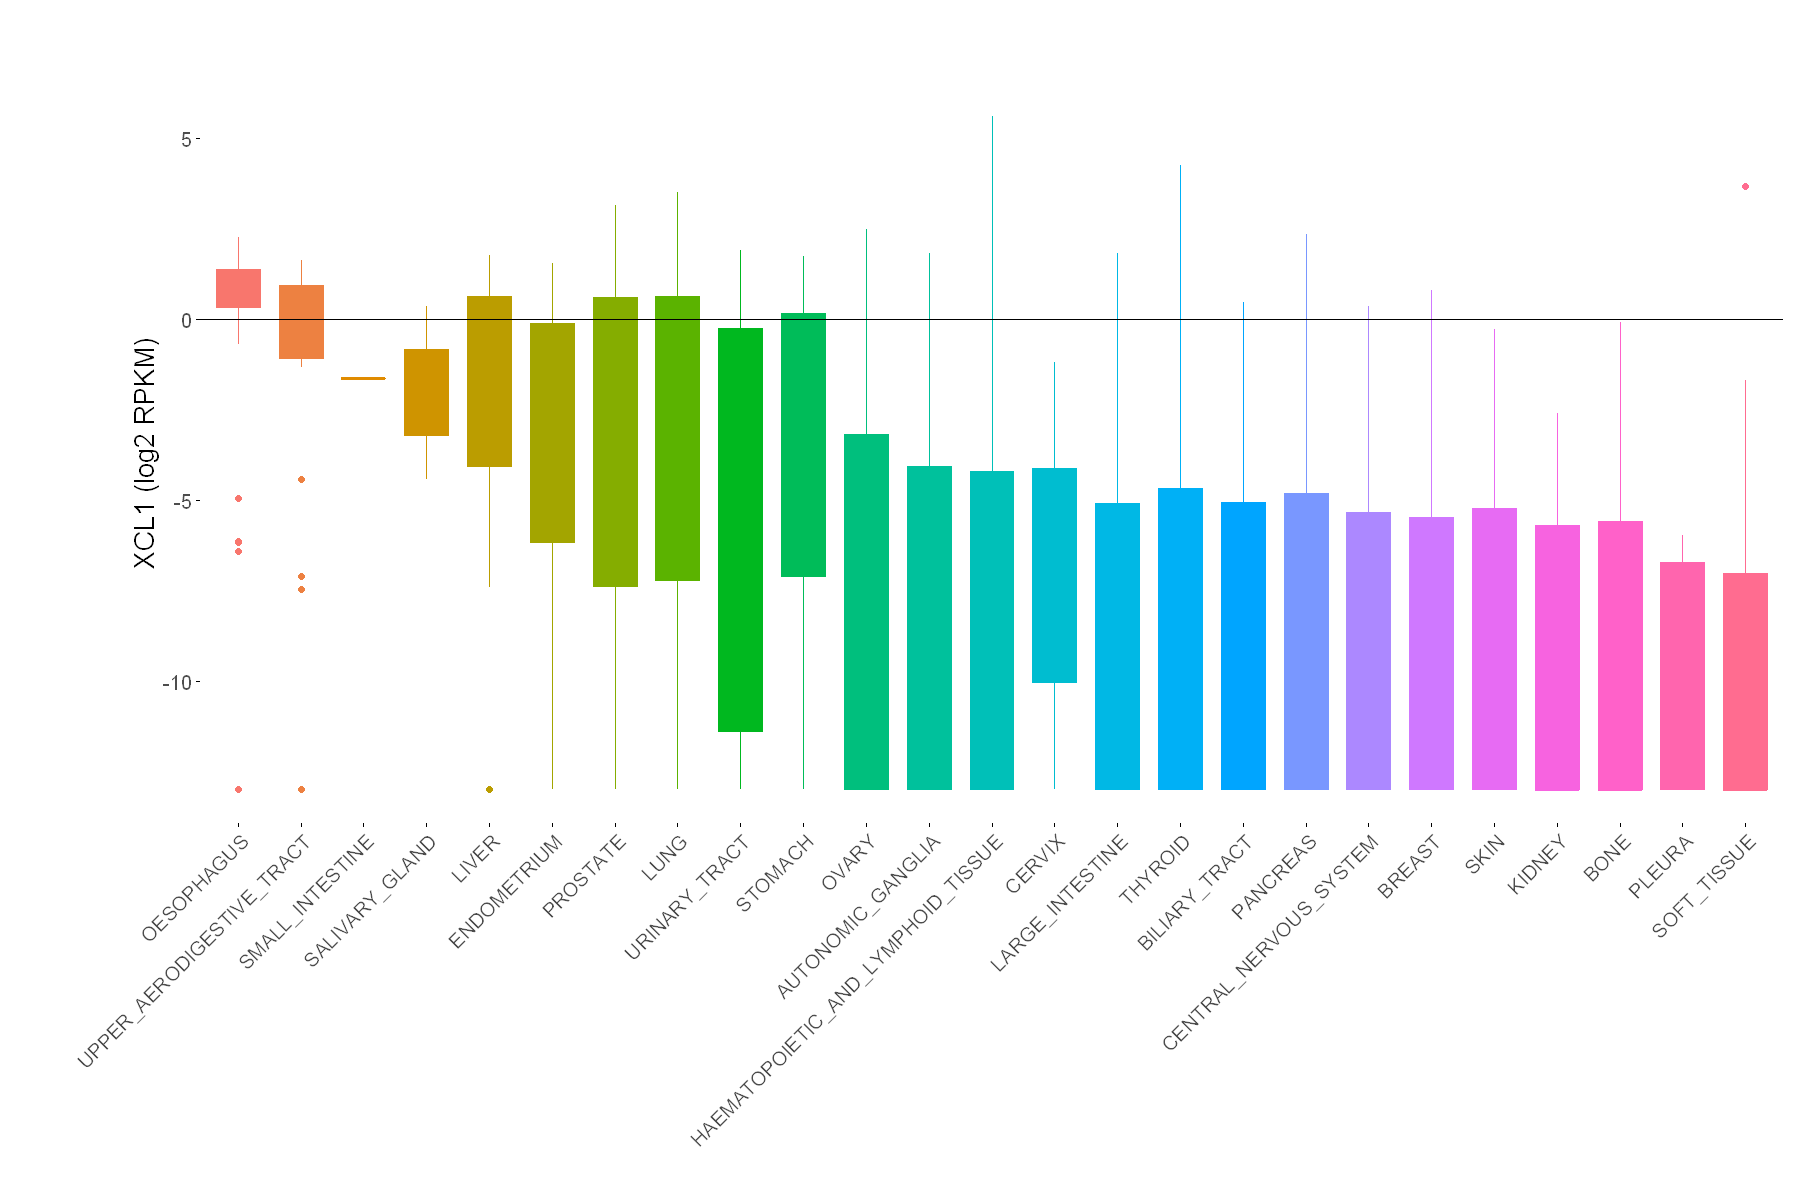

In [3]:
data=ccle[colnames(ccle)[!is.na(ccle)]]
data=as.data.frame(t(data))
data$source=colsplit(rownames(data),"_",names=c("cells","type"))[,"type"]
order=with(data, tapply(XCL1, source, mean))
order=names(sort(order,decreasing = TRUE))

options(repr.plot.width=15,repr.plot.height=10)
p <- ggboxplot(data, x = "source", y = "XCL1",legend.title="",xlab = "",
                color="source",
                fill = "source", 
                x.text.angle = 45,
               order=order,
               ggtheme=theme_minimal())+guides(col = guide_legend(ncol=1))+ylab("XCL1 (log2 RPKM)")+
theme(plot.margin=margin(50,10,20,80),panel.grid=element_blank(),legend.position="none")
ggpar(p+geom_hline(yintercept = 0),font.legend = c(10),font.y=c(16),font.ytickslab = c(12),font.xtickslab = c(12))

## Figure 3D

In [15]:
LGR6=read.table("data/mRNA expression (RNAseq)_ LGR6.txt",sep="\t",header=T,row.names=1)

Warning message in read.table("data/mRNA expression (RNAseq)_ LGR6.txt", sep = "\t", :
"incomplete final line found by readTableHeader on 'data/mRNA expression (RNAseq)_ LGR6.txt'"


In [16]:
ECXCL=ccle[,grep("ESOPHAGUS",colnames(ccle))]

In [22]:
ECLGR6=LGR6[,colnames(ECXCL)]
data=as.data.frame(t(rbind(ECXCL,ECLGR6)))

In [26]:
rownames(data)=gsub("_OESOPHAGUS","",rownames(data))

In [28]:
ESCC=c("TE4","TE8","KYSE150","TE1","KYSE270","KYSE180","KYSE450","KYSE410","TE11","TE15","OE21",
      "KYSE140","KYSE510","TE10","TE6","TE14","TE9","KYSE520","COLO680N","KYSE30","TE5")

In [30]:
data=data[ESCC,]

In [31]:
cor.test(data[,1],data[,2])


	Pearson's product-moment correlation

data:  data[, 1] and data[, 2]
t = 2.5269, df = 19, p-value = 0.02054
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08913699 0.76712763
sample estimates:
      cor 
0.5015254 


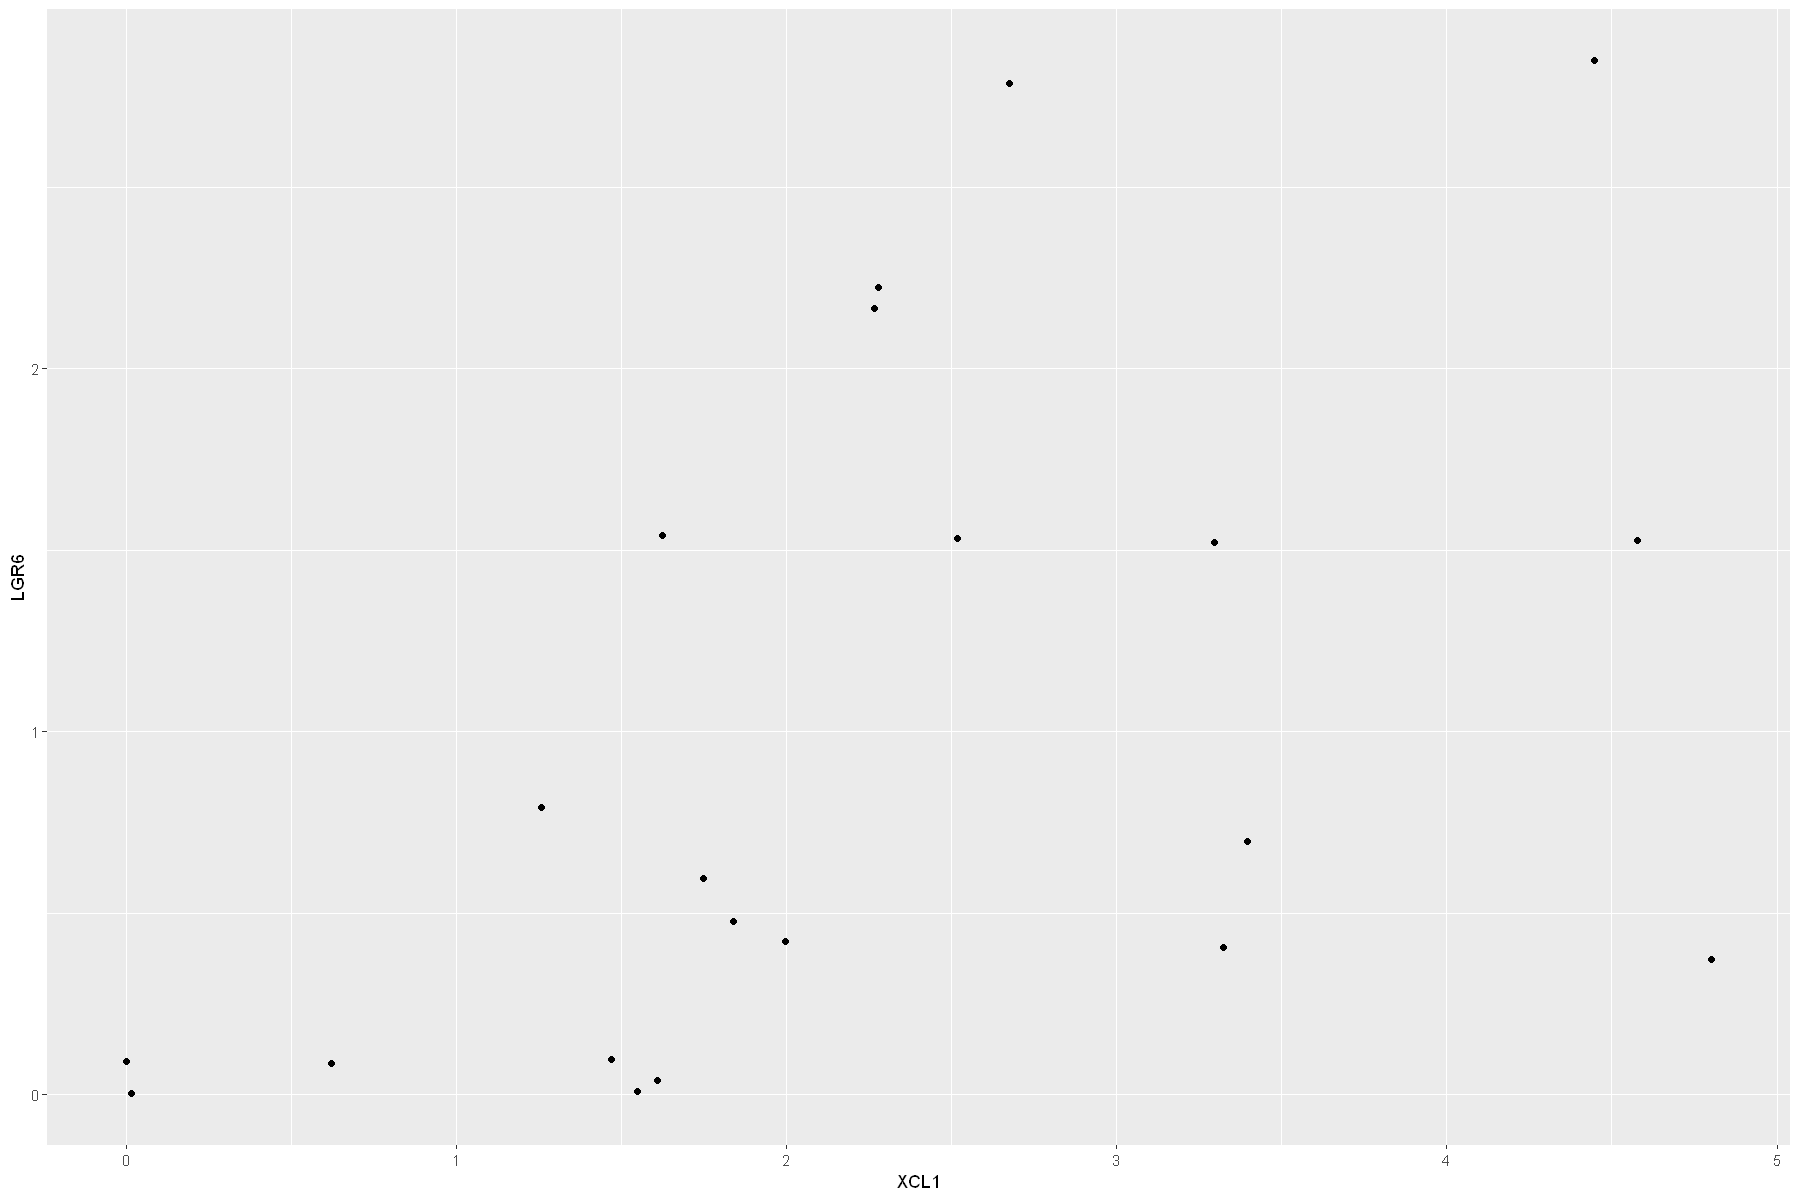

In [36]:
ggplot(2**data，aes(x=XCL1,y=LGR6))+geom_point()